# Практическая работа №9. Генерация сигналов и преобразования Фурье

# Блок №1. Базовый уровень

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import spectrogram

## **Задание 1: Генерация сигналов**



В этом задании вам нужно создать различные виды сигналов. Сигналы являются основой цифровой обработки сигналов, и умение их генерировать является важным навыком.













1. **Синусоидальный сигнал**: Синусоидальный сигнал можно представить как $A \sin(2\pi ft + \phi)$, где $A$ - амплитуда, $f$ - частота, $\phi$ - фаза.

- Создайте функцию, которая принимает эти параметры, а также длительность сигнала, и возвращает сгенерированный сигнал.

### Пример:



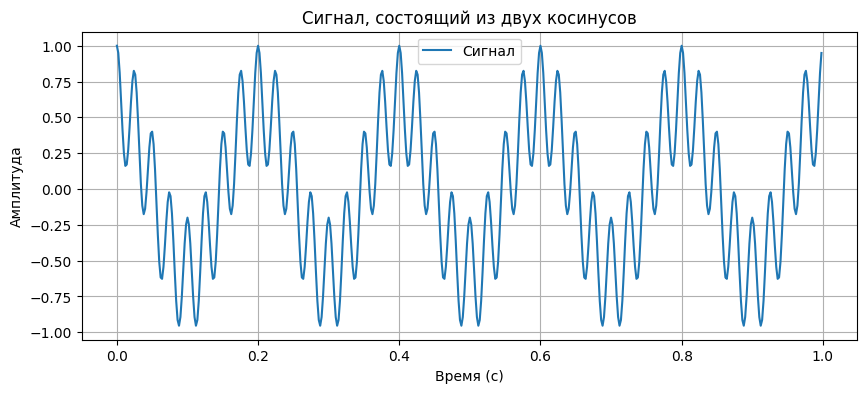

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Параметры времени
T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
t = np.arange(0, T, 1/fs) # массив времени

# Создание сигнала
f1 = 5.0        # частота первого косинуса
f2 = 40.0       # частота второго косинуса
a1 = 0.6        # амплитуда первого косинуса
a2 = 0.4        # амплитуда второго косинуса
signal = a1*np.cos(2*np.pi*f1*t) + a2*np.cos(2*np.pi*f2*t)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал, состоящий из двух косинусов')
plt.legend()
plt.grid(True)
plt.show()


### Ваш код:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


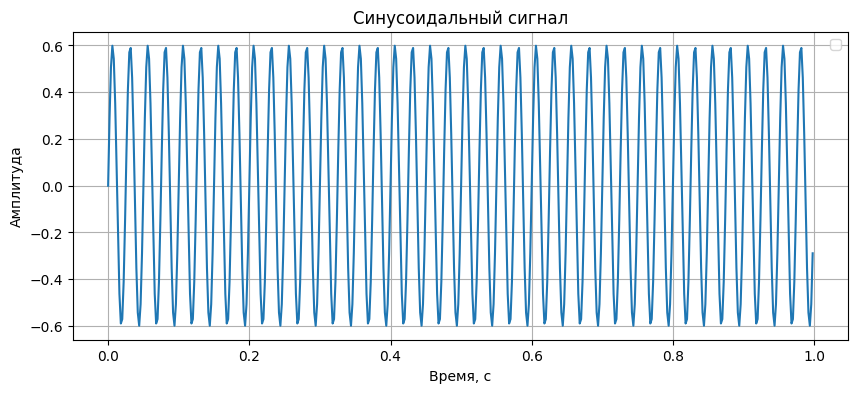

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def generate_single_sine(T, fs, f, a, phi):
    """
    Генерирует синусоидальный сигнал вида A * sin(2 * pi * f * t + phi).
    
    Аргументы:
        T (float): длительность сигнала в секундах
        fs (float): частота дискретизации (выборок в секунду)
        f (float): частота синуса
        a (float): амплитуда синуса
        phi (float): фаза синуса
    
    Возвращает:
        tuple: (t, signal) — массив времени и сгенерированный сигнал
    """
    # Массив времени
    t = np.arange(0, T, 1/fs)
    
    # Генерация сигнала
    signal = a * np.sin(2 * np.pi * f * t + phi)
    
    return t, signal

# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f = 40.0  # частота синуса
a = 0.6   # амплитуда синуса
phi = 0.0  # фаза синуса

# Генерация сигнала
t, signal = generate_single_sine(T, fs, f, a, phi)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Синусоидальный сигнал')
plt.legend()
plt.grid(True)
plt.show()

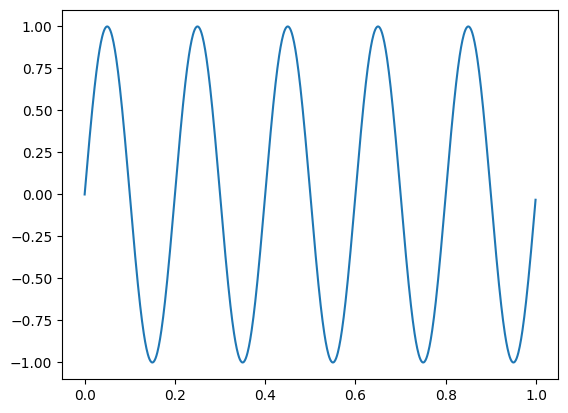

In [ ]:
# Пример

2. **Сумма синусоид**: Сигнал, состоящий из суммы двух синусоид, можно представить как $A_1 \sin(2\pi f_1t + \phi_1) + A_2 \sin(2\pi f_2t + \phi_2)$.

- Создайте функцию, которая принимает параметры для двух синусоид, а также длительность сигнала, и возвращает сгенерированный сигнал.

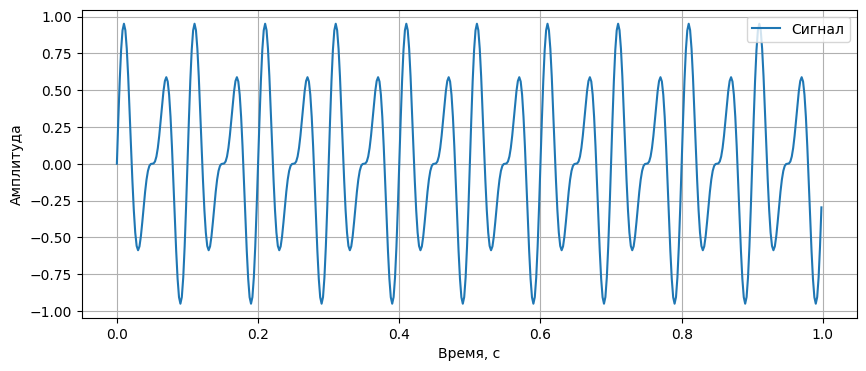

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_signal(T, fs, f1, f2, a1, a2, phi1, phi2):
    # Массив времени
    t = np.arange(0, T, 1/fs)
    
    # Генерация сигнала
    signal = a1 * np.sin(2 * np.pi * f1 * t + phi1) + a2 * np.sin(2 * np.pi * f2 * t + phi2)
    
    return t, signal

# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f1 = 20.0  # частота первого синуса
f2 = 30.0  # частота второго синуса
a1 = 0.6   # амплитуда первого синуса
a2 = 0.4   # амплитуда второго синуса
phi1 = 0.0  # фаза первого синуса
phi2 = 0.0  # фаза второго синуса

# Генерация сигнала
t, signal = generate_sine_signal(T, fs, f1, f2, a1, a2, phi1, phi2)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

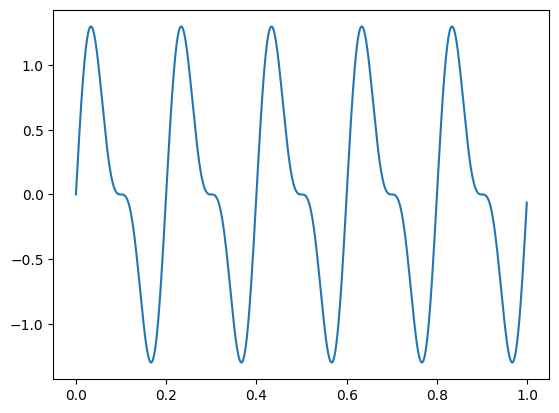

In [ ]:
# Пример

3. **Шумовой сигнал**: Шумовой сигнал (или белый шум) можно сгенерировать как случайные значения из нормального распределения.

- Создайте функцию, которая принимает амплитуду шума и длительность сигнала, и возвращает сгенерированный шумовой сигнал.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


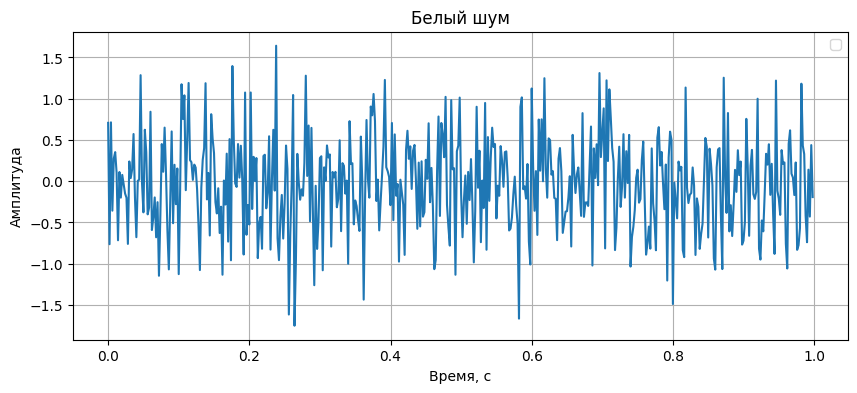

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def generate_white_noise(T, fs, amplitude):
    # Массив времени
    t = np.arange(0, T, 1/fs)
    
    # Генерация белого шума (нормальное распределение)
    noise = np.random.normal(0, amplitude, len(t))
    
    return t, noise

# Параметры шума
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
amplitude = 0.6  # амплитуда шума

t, noise = generate_white_noise(T, fs, amplitude)

plt.figure(figsize=(10, 4))
plt.plot(t, noise)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Белый шум')
plt.legend()
plt.grid(True)
plt.show()

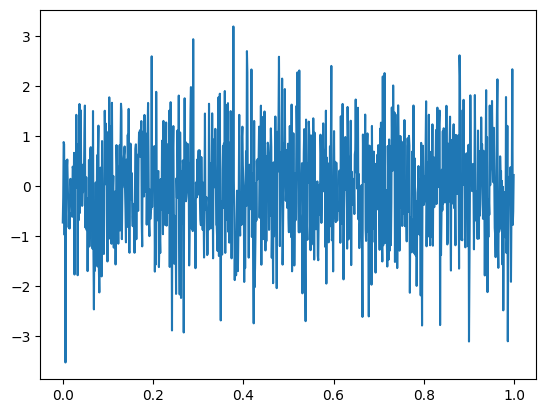

In [ ]:
# Пример

4. **Синусоида плюс шум**: Сигнал, который представляет собой сумму синусоиды и шума, можно сгенерировать путем сложения синусоидального и шумового сигналов.
- Создайте функцию, которая принимает параметры для синусоиды и шума, а также длительность сигнала, и возвращает сгенерированный сигнал.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


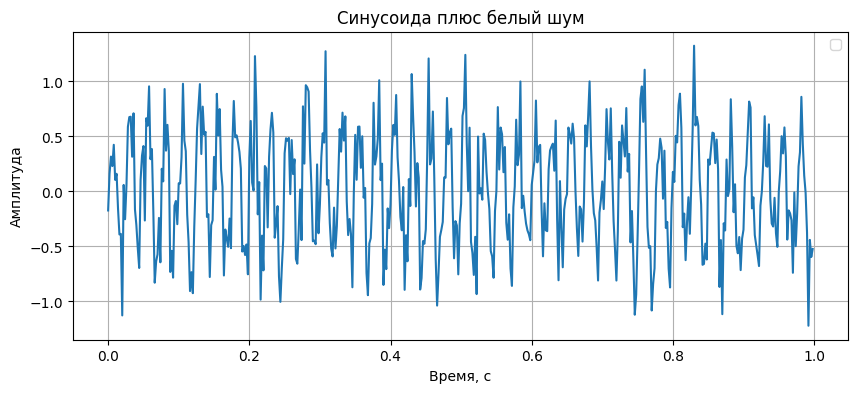

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sin_sine(T, fs, f, a, phi):
    t = np.arange(0, T, 1/fs)
    signal = a * np.sin(2 * np.pi * f * t + phi)
    return t, signal

def generate_white_noise(T, fs, amplitude):
    t = np.arange(0, T, 1/fs)
    noise = np.random.normal(0, amplitude, len(t))
    return t, noise

def generate_sine_plus_noise(T, fs, f, a_sine, phi, a_noise):
    t, sine_signal = generate_sin_sine(T, fs, f, a_sine, phi)
    
    _, noise = generate_white_noise(T, fs, a_noise)
    
    signal = sine_signal + noise
    
    return t, signal

# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f = 40.0  # частота синуса
a_sine = 0.6  # амплитуда синуса
phi = 0.0  # фаза синуса
a_noise = 0.3  # амплитуда шума

t, signal = generate_sine_plus_noise(T, fs, f, a_sine, phi, a_noise)

plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Синусоида плюс белый шум')
plt.legend()
plt.grid(True)
plt.show()

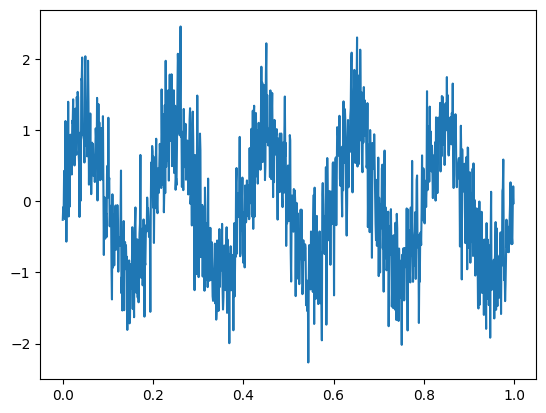

In [ ]:
# Пример

## **Задание 2: Преобразование Фурье**


Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Это основной инструмент для анализа сигналов. Создайте функцию, которая принимает сигнал и возвращает его преобразование Фурье.


1. Примените преобразование Фурье к синусоидальному сигналу и визуализируйте результат.


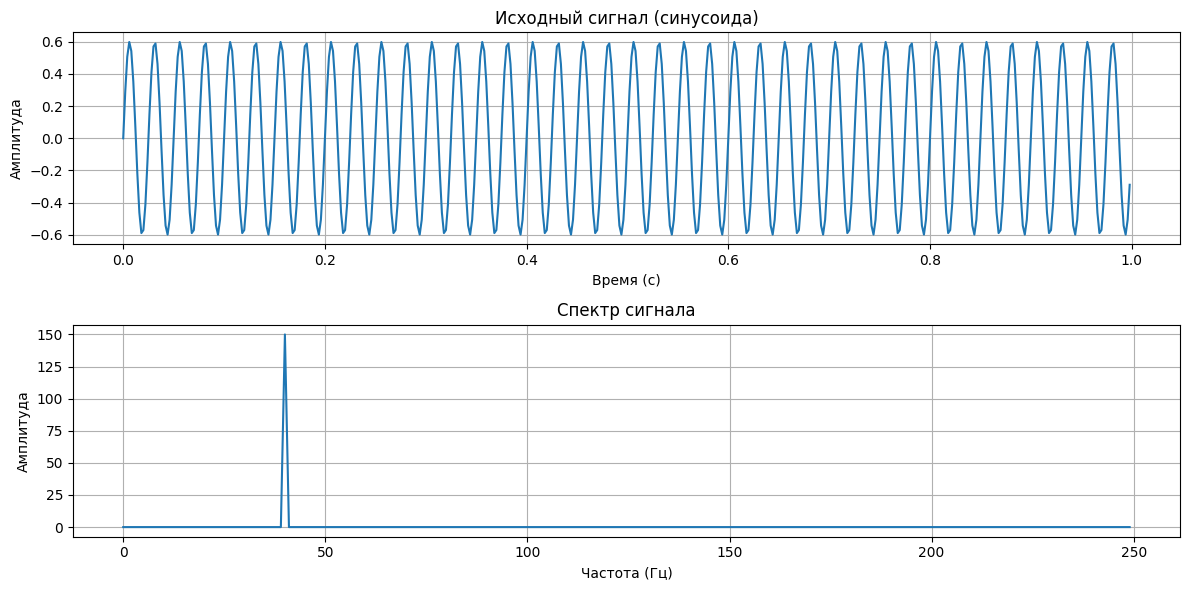

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f = 40.0  # частота синуса
a = 0.6   # амплитуда синуса
phi = 0.0  # фаза синуса

# Генерация сигнала
t, signal = generate_sin_sine(T, fs, f, a, phi)

# Преобразование Фурье
fft_result = fft(signal)  # Быстрое преобразование Фурье
frequencies = fftfreq(len(t), 1 / fs)  # Частоты

# Визуализация
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Исходный сигнал (синусоида)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()

# Спектр сигнала
plt.subplot(2, 1, 2)
plt.plot(frequencies[:int(fs // 2)], np.abs(fft_result)[:int(fs // 2)])  # Положительные частоты
plt.title("Спектр сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()

plt.tight_layout()
plt.show()

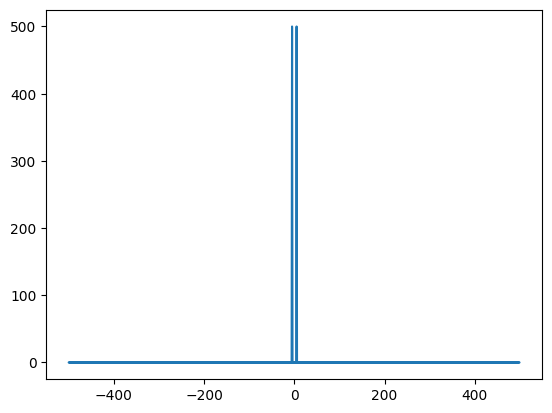

In [ ]:
# Пример

2. Примените преобразование Фурье к сигналу, состоящему из суммы двух синусоид, и визуализируйте результат.


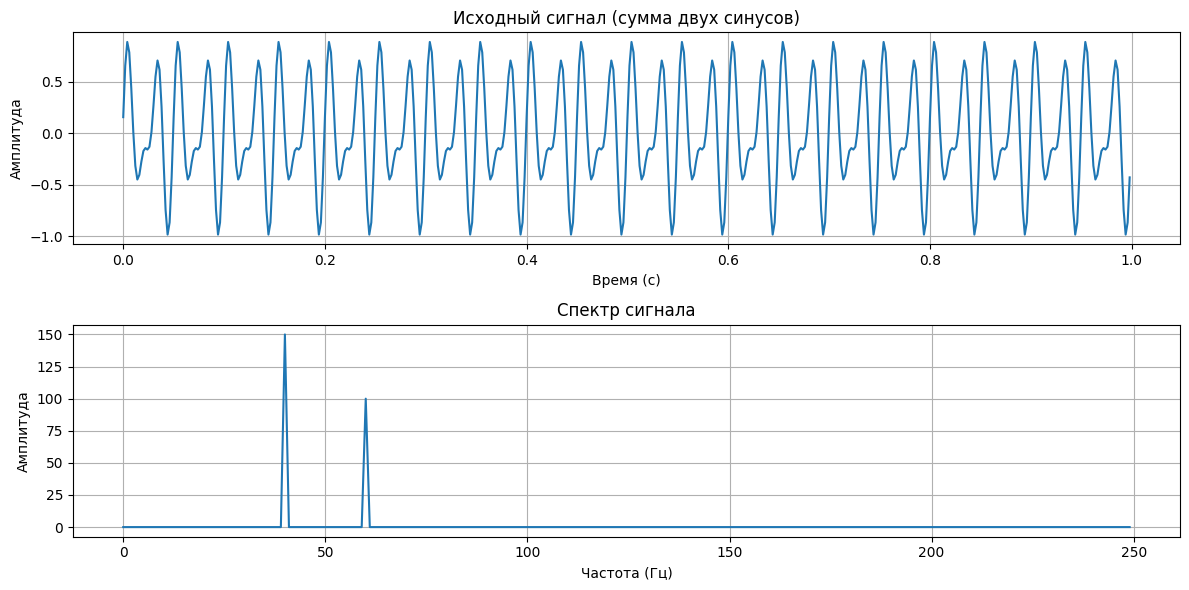

In [10]:
# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f1 = 40.0  # частота первого синуса
f2 = 60.0  # частота второго синуса
a1 = 0.6   # амплитуда первого синуса
a2 = 0.4   # амплитуда второго синуса
phi1 = 0.0  # фаза первого синуса
phi2 = 0.4  # фаза второго синуса

# Генерация сигнала
t, signal = generate_sine_signal(T, fs, f1, f2, a1, a2, phi1, phi2)

# Преобразование Фурье
fft_result = fft(signal)  # Быстрое преобразование Фурье
frequencies = fftfreq(len(t), 1 / fs)  # Частоты

# Визуализация
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Исходный сигнал (сумма двух синусов)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()

# Спектр сигнала
plt.subplot(2, 1, 2)
plt.plot(frequencies[:int(fs // 2)], np.abs(fft_result)[:int(fs // 2)])  # Положительные частоты
plt.title("Спектр сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()

plt.tight_layout()
plt.show()

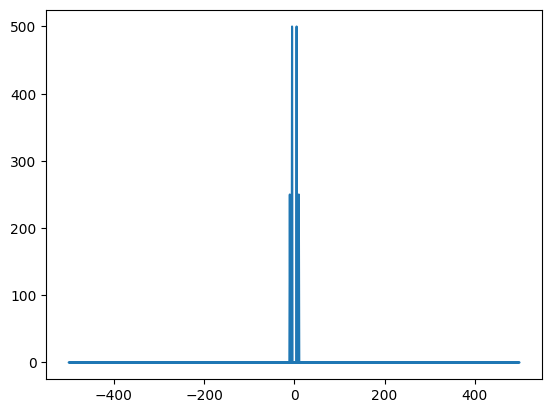

In [ ]:
# Пример

3. Примените преобразование Фурье к шумовому сигналу и визуализируйте результат.


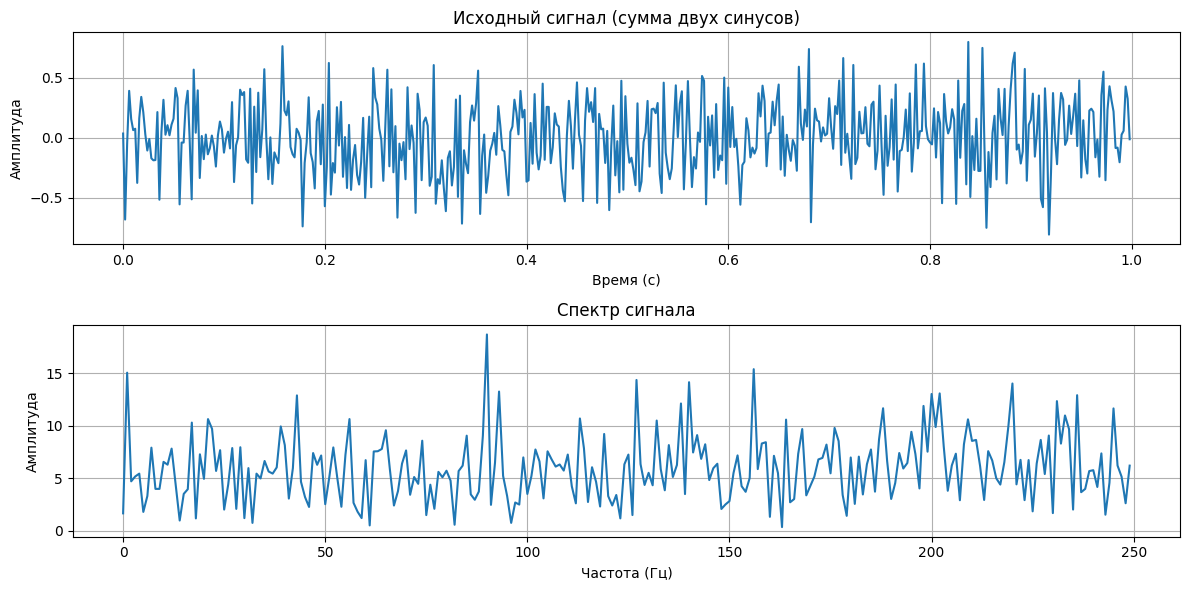

In [12]:
# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
a1 = 0.3   # амплитуда

# Генерация сигнала
t, signal = generate_white_noise(T, fs, a1)

# Преобразование Фурье
fft_result = fft(signal)  # Быстрое преобразование Фурье
frequencies = fftfreq(len(t), 1 / fs)  # Частоты

# Визуализация
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Исходный сигнал (сумма двух синусов)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()

# Спектр сигнала
plt.subplot(2, 1, 2)
plt.plot(frequencies[:int(fs // 2)], np.abs(fft_result)[:int(fs // 2)])  # Положительные частоты
plt.title("Спектр сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()

plt.tight_layout()
plt.show()

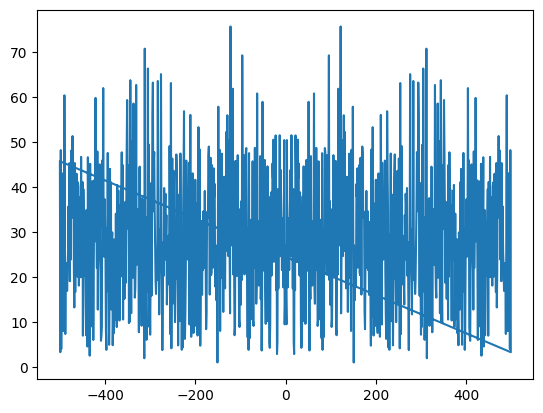

In [ ]:
# Пример

4. Примените преобразование Фурье к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результат.

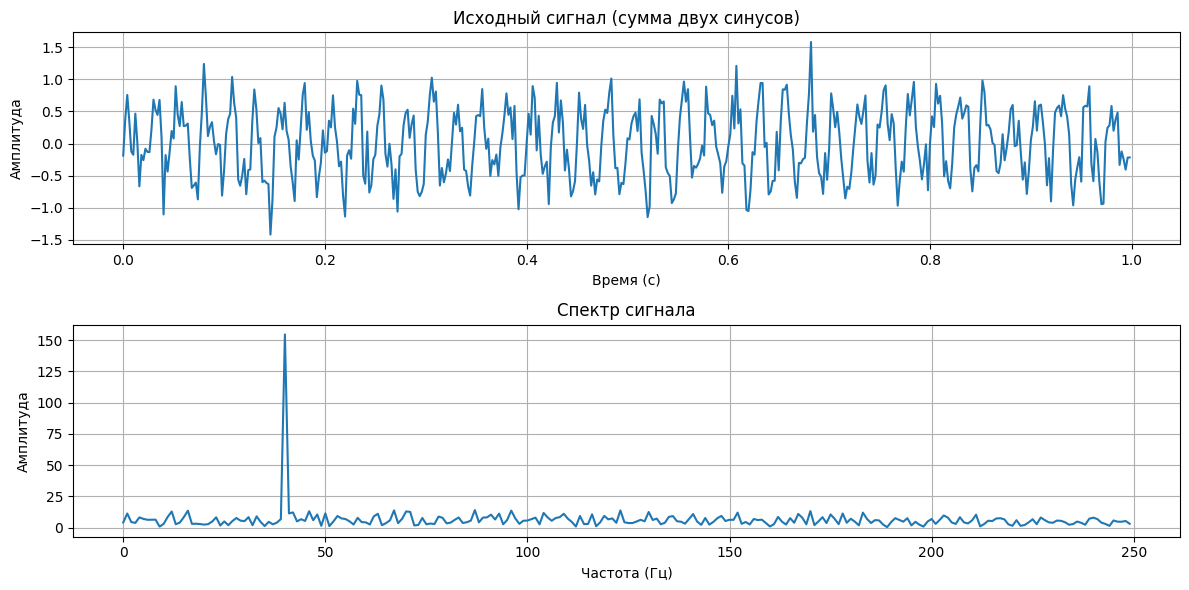

In [13]:
# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f = 40.0  # частота синуса
a_sine = 0.6  # амплитуда синуса
phi = 0.0  # фаза синуса
a_noise = 0.3  # амплитуда шума

t, signal = generate_sine_plus_noise(T, fs, f, a_sine, phi, a_noise)

# Преобразование Фурье
fft_result = fft(signal)  # Быстрое преобразование Фурье
frequencies = fftfreq(len(t), 1 / fs)  # Частоты

# Визуализация
plt.figure(figsize=(12, 6))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Исходный сигнал (сумма двух синусов)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()

# Спектр сигнала
plt.subplot(2, 1, 2)
plt.plot(frequencies[:int(fs // 2)], np.abs(fft_result)[:int(fs // 2)])  # Положительные частоты
plt.title("Спектр сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.grid()

plt.tight_layout()
plt.show()

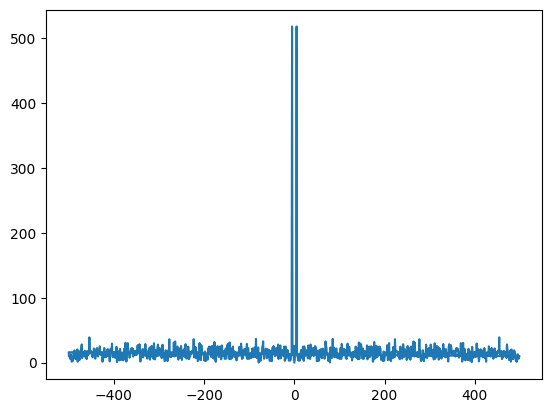

In [ ]:
# Пример

## **Задание 3: Фильтрация сигналов**

Фильтрация сигналов позволяет улучшить качество сигнала, убрав нежелательные частоты. Создайте функцию, которая принимает сигнал и частоту среза, и возвращает отфильтрованный сигнал.




1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

def generate_single_sine(T, fs, f, a, phi):
    t = np.arange(0, T, 1/fs)
    signal = a * np.sin(2 * np.pi * f * t + phi)
    return t, signal

def generate_white_noise(T, fs, amplitude):
    t = np.arange(0, T, 1/fs)
    noise = np.random.normal(0, amplitude, len(t))
    return t, noise

def generate_sine_plus_noise(T, fs, f, a_sine, phi, a_noise):
    t, sine_signal = generate_single_sine(T, fs, f, a_sine, phi)
    _, noise = generate_white_noise(T, fs, a_noise)
    signal = sine_signal + noise
    return t, signal

def filter_signal(signal, fs, cutoff_freq, main_freq, bandwidth=5):
    #Фильтрует сигнал, оставляя частоты в заданном диапазоне вокруг основной частоты.
    #main_freq (float): основная частота, которую нужно сохранить
    #bandwidth (float): ширина полосы вокруг основной частоты (по умолчанию 5 Гц)

    # Преобразование Фурье
    fft_result = fft(signal)
    frequencies = fftfreq(len(signal), 1 / fs)
    
    # Создаём фильтр: обнуляем частоты вне заданного диапазона
    fft_filtered = fft_result.copy()
    for i in range(len(frequencies)):
        freq = frequencies[i]
        # Оставляем только частоты в диапазоне [main_freq - bandwidth, main_freq + bandwidth]
        # и частоты ниже cutoff_freq
        if not (abs(freq) >= main_freq - bandwidth and abs(freq) <= main_freq + bandwidth) or abs(freq) > cutoff_freq:
            fft_filtered[i] = 0
    
    # Обратное преобразование Фурье
    filtered_signal = np.real(ifft(fft_filtered))
    
    return filtered_signal

In [ ]:
# Пример

2. Примените эту функцию к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результаты до и после фильтрации.

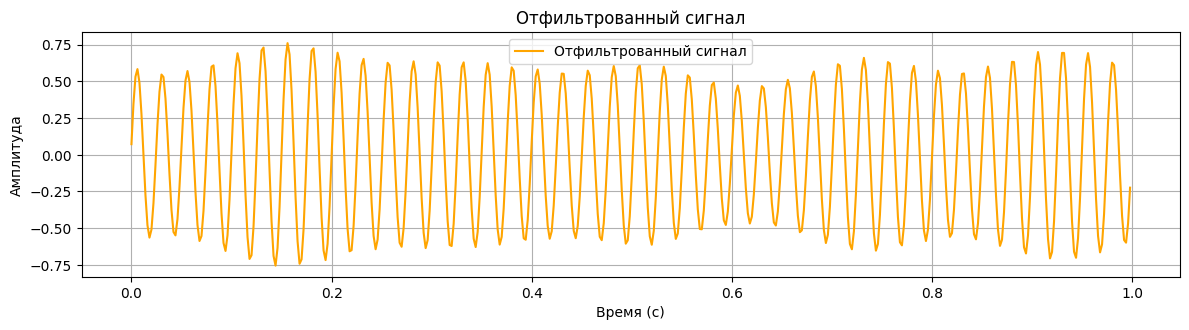

In [ ]:
T = 1.0  
fs = 500.0 
f = 40.0  
a_sine = 0.6 
phi = 0.0  
a_noise = 0.3 

# Генерация сигнала (синусоида + шум)
t, signal = generate_sine_plus_noise(T, fs, f, a_sine, phi, a_noise)

# Фильтрация сигнала
cutoff_freq = 100.0  # частота среза (Гц)
main_freq = 40.0  # основная частота синусоиды
filtered_signal = filter_signal(signal, fs, cutoff_freq, main_freq, bandwidth=5)

# Визуализация
plt.figure(figsize=(12, 6))

# Исходный сигнал
# plt.subplot(2, 1, 1)
# plt.plot(t, signal, label='Исходный сигнал (синусоида + шум)')
# plt.title("Исходный сигнал")
# plt.xlabel("Время (с)")
# plt.ylabel("Амплитуда")
# plt.grid()
# plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', color='orange')
plt.title("Отфильтрованный сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

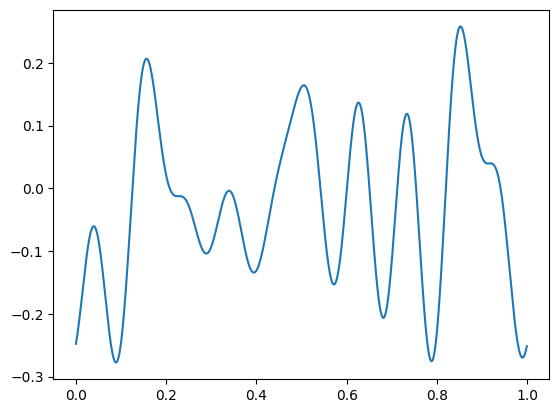

In [ ]:
# Пример

## **Задание 4: Анализ сигналов**

Анализ сигналов включает в себя различные методы и техники для изучения и понимания сигналов. Создайте функцию, которая принимает сигнал и возвращает его спектрограмму (**scipy.signal.spectrogram**).


**Спектрограмма** - это визуальное представление спектра частот сигнала во времени. Она показывает, какие частоты присутствуют в сигнале в каждый момент времени. Вот как правильно понимать спектрограмму:

- **Ось X**: Это время. Она показывает продолжительность сигнала. Каждый столбец на спектрограмме представляет собой отдельный момент времени.

- **Ось Y**: Это частота. Она показывает различные частоты, которые присутствуют в сигнале. Каждая строка на спектрограмме представляет собой отдельную частоту.

- **Значение**: Значение в каждой точке (x, y) показывает амплитуду (или интенсивность) данной частоты в данное время. Обычно более яркие цвета означают большую амплитуду, а более темные цвета - меньшую амплитуду.

Таким образом, спектрограмма позволяет вам видеть, как меняется спектральный состав сигнала во времени. Это может быть полезно во многих областях, включая анализ речи, музыку, радиосигналы и многое другое. Например, в анализе речи вы можете видеть, как меняются форманты (основные частоты) во время произношения различных звуков. В музыке вы можете видеть, как меняются ноты во время проигрывания песни.

1. Создайте функцию для вычисления и визуализации спектрограммы сигнала.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def generate_single_sine(T, fs, f, a, phi):
    t = np.arange(0, T, 1/fs)
    signal = a * np.sin(2 * np.pi * f * t + phi)
    return t, signal

def generate_sine_signal(T, fs, f1, f2, a1, a2, phi1, phi2):
    t = np.arange(0, T, 1/fs)
    signal = a1 * np.sin(2 * np.pi * f1 * t + phi1) + a2 * np.sin(2 * np.pi * f2 * t + phi2)
    return t, signal

def generate_white_noise(T, fs, amplitude):
    t = np.arange(0, T, 1/fs)
    noise = np.random.normal(0, amplitude, len(t))
    return t, noise

def generate_sine_plus_noise(T, fs, f, a_sine, phi, a_noise):
    t, sine_signal = generate_single_sine(T, fs, f, a_sine, phi)
    _, noise = generate_white_noise(T, fs, a_noise)
    signal = sine_signal + noise
    return t, signal

# Функция для вычисления и визуализации спектрограммы
def plot_spectrogram(signal, fs, title="Spectrogram"):
    """
    Вычисляет и визуализирует спектрограмму сигнала.
    
    Аргументы:
        signal (numpy.ndarray): входной сигнал
        fs (float): частота дискретизации (выборок в секунду)
        title (str): заголовок графика
    """
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=256, noverlap=128)
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
    plt.colorbar(label='Intensity [dB]')
    plt.title(title)
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    plt.ylim(0, 250)  # Ограничим частоту до 250 Гц для лучшей видимости
    plt.show()

2. Примените эту функцию к различным сигналам, которые вы сгенерировали и проанализировали в предыдущих заданиях.

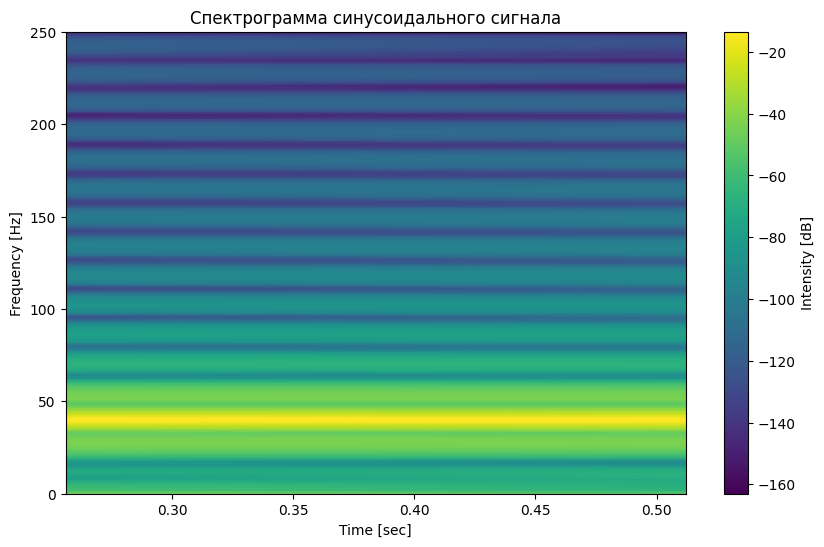

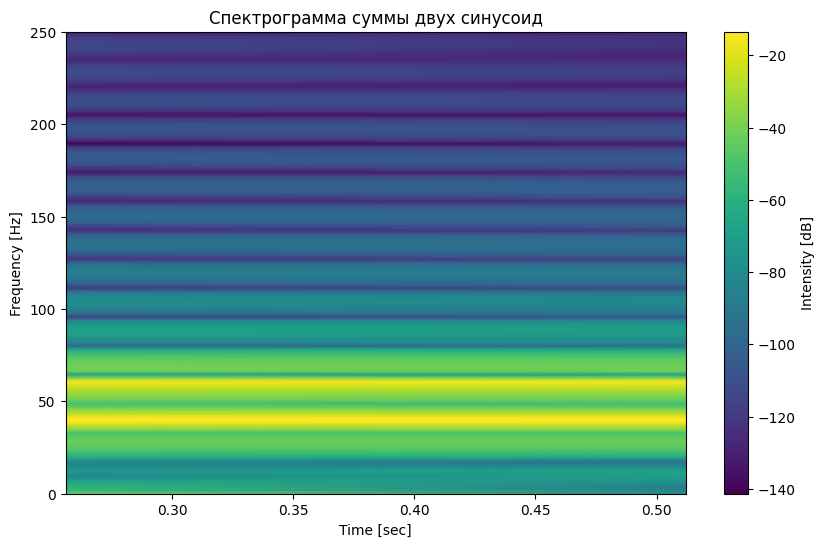

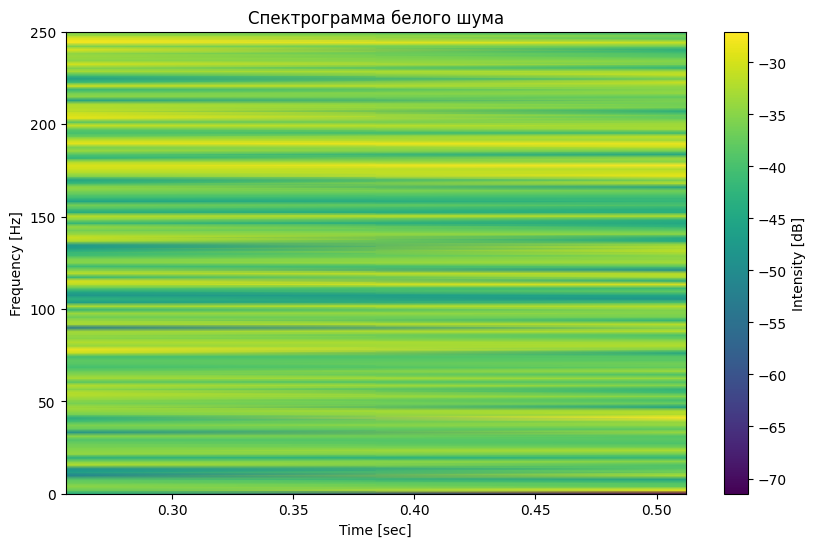

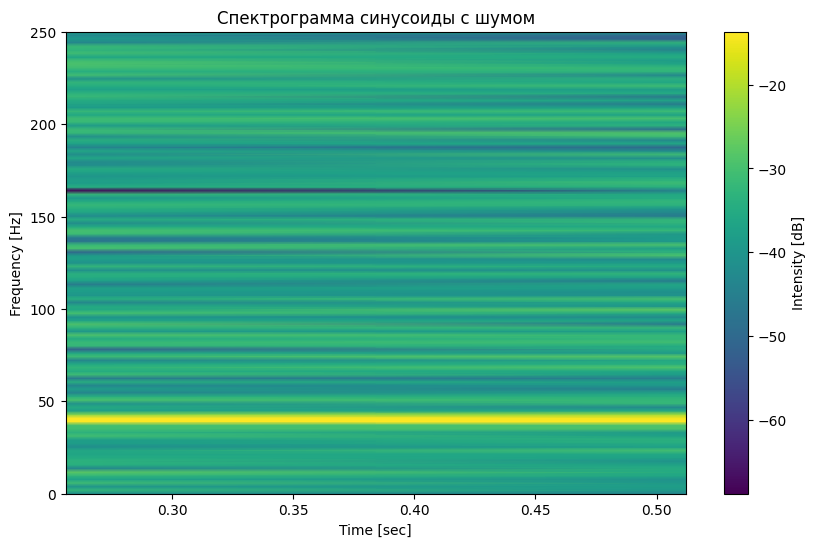

In [ ]:
T = 1.0  # длительность сигнала в секундах
fs = 500.0 

# 1. Синусоидальный сигнал
f = 40.0  # частота синуса
a = 0.6   # амплитуда синуса
phi = 0.0  # фаза синуса
t, sine_signal = generate_single_sine(T, fs, f, a, phi)
plot_spectrogram(sine_signal, fs, title="Спектрограмма синусоидального сигнала")

# 2. Сумма двух синусоид
f1 = 40.0  
f2 = 60.0  
a1 = 0.6   
a2 = 0.4   
phi1 = 0.0 
phi2 = 0.4 
t, two_sines_signal = generate_sine_signal(T, fs, f1, f2, a1, a2, phi1, phi2)
plot_spectrogram(two_sines_signal, fs, title="Спектрограмма суммы двух синусоид")

# 3. Белый шум
a_noise = 0.3  # амплитуда шума
t, noise_signal = generate_white_noise(T, fs, a_noise)
plot_spectrogram(noise_signal, fs, title="Спектрограмма белого шума")

# 4. Синусоида с шумом
t, sine_noise_signal = generate_sine_plus_noise(T, fs, f, a, phi, a_noise)
plot_spectrogram(sine_noise_signal, fs, title="Спектрограмма синусоиды с шумом")

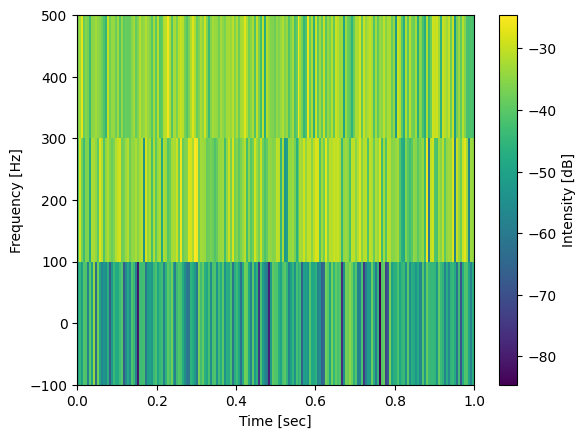

In [ ]:
# Пример

# Блок №2. Повышенный уровень

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io import wavfile

## **Задание 1: Чтение и визуализация звукового файла**











В этом задании вам нужно использовать функцию `wavfile.read` из модуля `scipy.io` для чтения звукового файла. Эта функция возвращает частоту дискретизации и данные аудиосигнала. Затем вы должны визуализировать эти данные с помощью `matplotlib.pyplot.plot`. В результате вы получите график амплитуды звукового сигнала во времени.

1. Используйте библиотеку `scipy.io.wavfile` для чтения звукового файла.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

filename = 'birds.wav'
fs, data = wavfile.read(filename)

if len(data.shape) > 1:
    data = data[:, 0]

C:\Users\Owl\AppData\Local\Temp\ipykernel_18348\1555330844.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


2. Визуализируйте временную форму звукового сигнала.

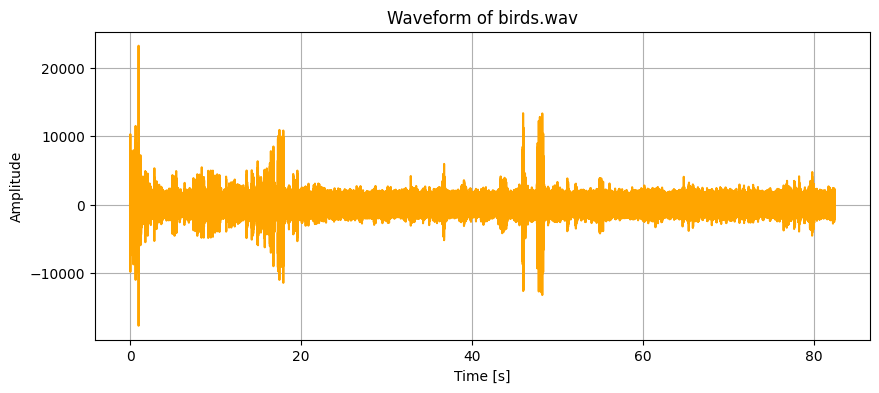

In [ ]:
t = np.arange(0, len(data)) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, data, color='orange')
plt.title(f"Waveform of {filename}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

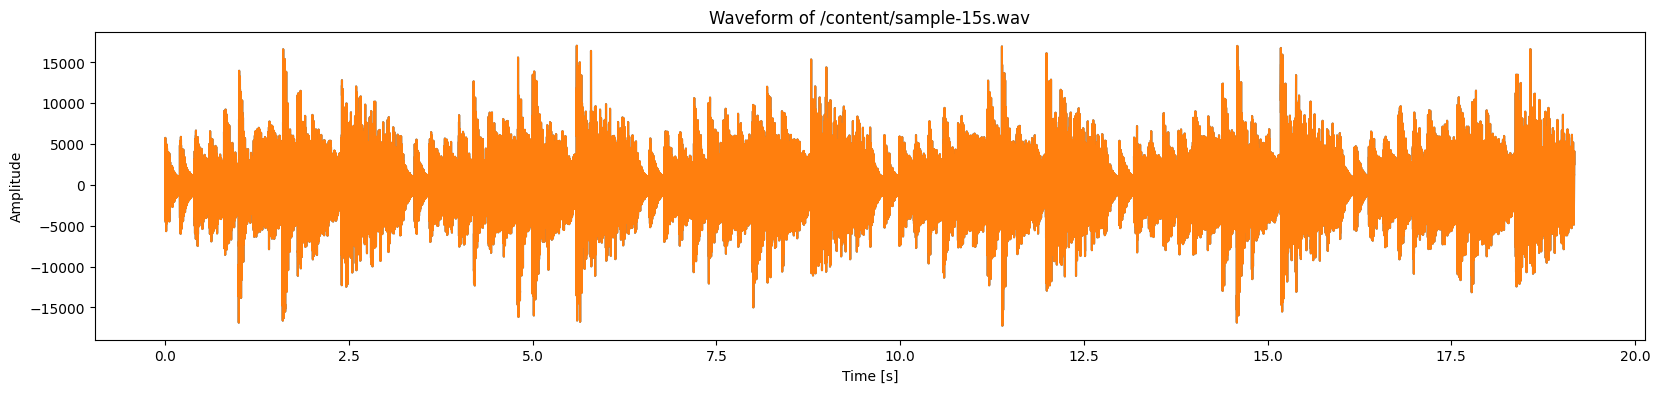

In [ ]:
# Пример

## **Задание 2: Применение преобразования Фурье**



Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Для его применения вы можете использовать функцию `fft` из модуля `scipy.fft`. Эта функция возвращает комплексные коэффициенты преобразования Фурье, которые затем можно визуализировать.

1. Примените преобразование Фурье к звуковому сигналу и визуализируйте спектр.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

filename = 'birds.wav'
fs, data = wavfile.read(filename)

if len(data.shape) > 1:
    data = data[:, 0]


C:\Users\Owl\AppData\Local\Temp\ipykernel_18348\665797147.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


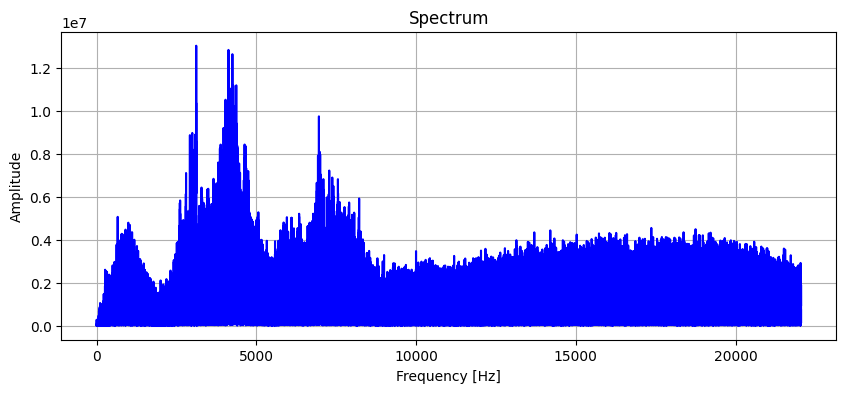

In [58]:
# Вычисляем FFT
fft_result = fft(data)
# Вычисляем частоты
frequencies = fftfreq(len(data), 1 / fs)
# Только положительные частоты
n = len(data) // 2
frequencies = frequencies[:n]
fft_magnitude = np.abs(fft_result)[:n]

plt.figure(figsize=(10, 4))
plt.plot(frequencies, fft_magnitude, color='blue')
plt.title("Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

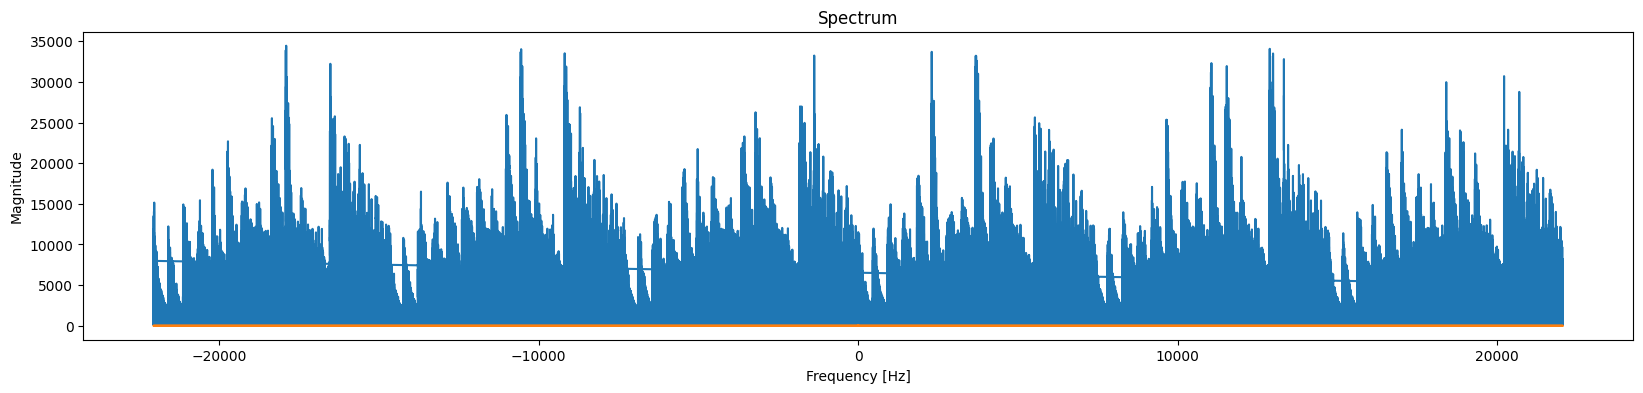

In [ ]:
# Пример

## **Задание 3: Фильтрация сигнала**



Фильтрация сигнала позволяет улучшить качество звука, убрав нежелательные частоты. Для этого вы можете использовать преобразование Фурье, затем обнулить некоторые из его коэффициентов и выполнить обратное преобразование Фурье с помощью функции `ifft` из модуля `scipy.fft`.

1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, ifft

# Шаг 1: Создание функции для фильтрации
def filter_signal(signal, fs, cutoff_freq):
    """
    Фильтрует сигнал, удаляя частоты выше cutoff_freq.
    
    Аргументы:
        signal (numpy.ndarray): входной сигнал
        fs (float): частота дискретизации (выборок в секунду)
        cutoff_freq (float): частота среза (Гц)
    
    Возвращает:
        numpy.ndarray: отфильтрованный сигнал
    """
    # Преобразование Фурье
    fft_result = fft(signal)
    frequencies = fftfreq(len(signal), 1 / fs)
    
    # Обнуляем частоты выше cutoff_freq
    fft_filtered = fft_result.copy()
    fft_filtered[np.abs(frequencies) > cutoff_freq] = 0
    
    # Обратное преобразование Фурье
    filtered_signal = np.real(ifft(fft_filtered))
    return filtered_signal

2. Примените эту функцию к звуковому сигналу и визуализируйте результаты до и после фильтрации.

C:\Users\Owl\AppData\Local\Temp\ipykernel_18348\2891535459.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


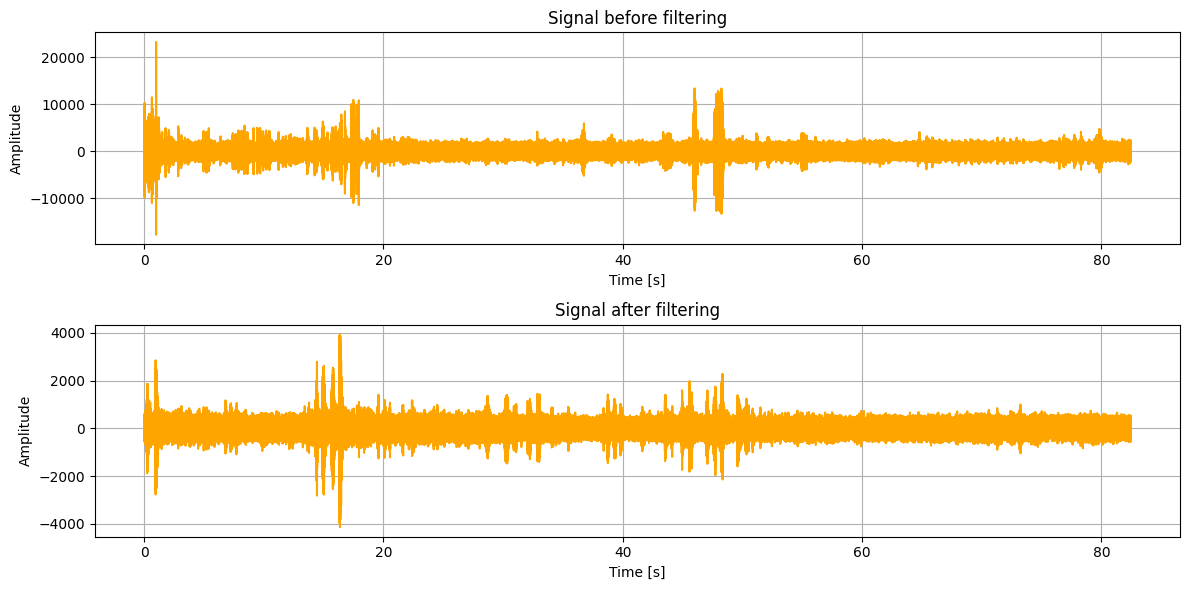

In [55]:
filename = 'birds.wav'
fs, data = wavfile.read(filename)

if len(data.shape) > 1:
    data = data[:, 0]

t = np.arange(0, len(data)) / fs

cutoff_freq = 3000.0 
filtered_data = filter_signal(data, fs, cutoff_freq)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, data, color='orange')
plt.title("Signal before filtering")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, filtered_data, color='orange')
plt.title("Signal after filtering")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

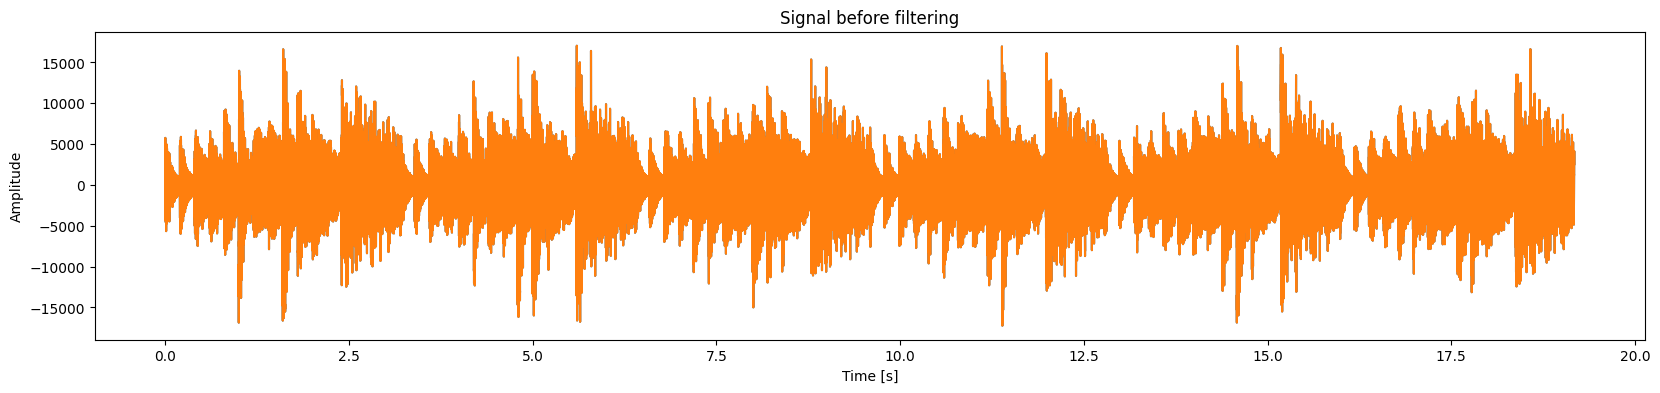

In [ ]:
# Визуализация сигнала до фильтрации

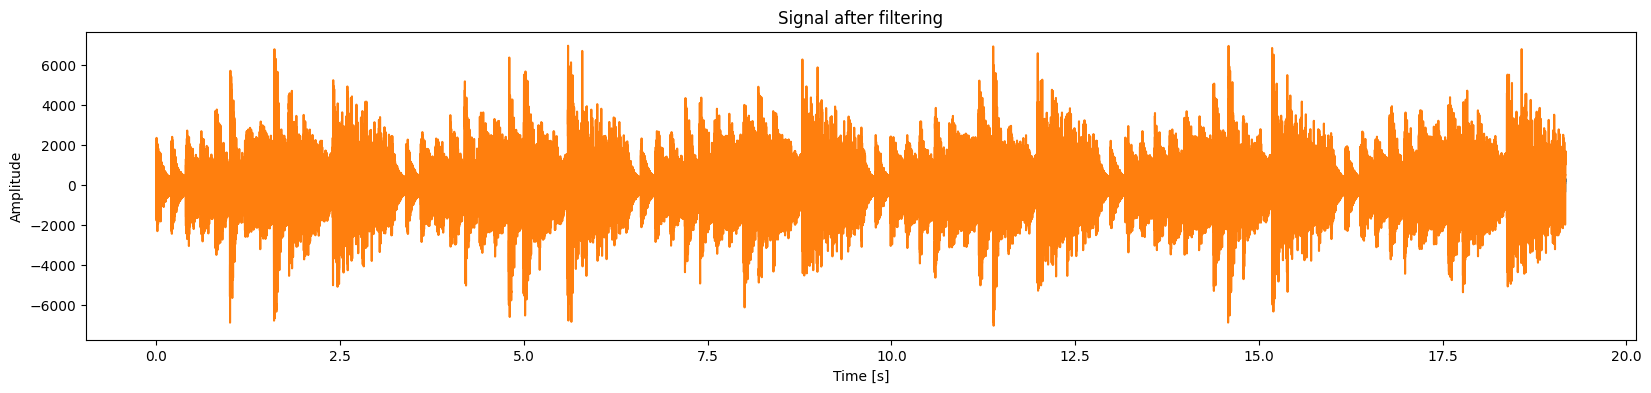

In [ ]:
# Визуализация сигнала после фильтрации

## **Задание 4: Обратное преобразование Фурье**



После фильтрации сигнала вы можете применить обратное преобразование Фурье для получения отфильтрованного звукового сигнала во временной области. Затем вы можете сохранить этот сигнал в новый звуковой файл с помощью функции `wavfile.write` из модуля `scipy.io`.

1. Примените обратное преобразование Фурье к отфильтрованному сигналу.


In [ ]:
import numpy as np
from scipy.io import wavfile

input_filename = 'birds.wav'
fs, data = wavfile.read(input_filename)

if len(data.shape) > 1:
    data = data[:, 0]

cutoff_freq = 3000.0 
filtered_data = filter_signal(data, fs, cutoff_freq)

C:\Users\Owl\AppData\Local\Temp\ipykernel_18348\3353565473.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(input_filename)


2. Сохраните полученный сигнал в новый звуковой файл.

In [ ]:
output_filename = 'birds_filtered_signal.wav'
filtered_data = filtered_data.astype(np.int16)
wavfile.write(output_filename, fs, filtered_data)